## Installing pyAudioAnalysis
First, clone the library using `git clone https://github.com/tyiannak/pyAudioAnalysis.git`

Next, `export PYTHONPATH=$PYTHONPATH:"/home/juliazeh/"` to export the path up to but not including the folder called pyAudioAnalysis. To find your current path, use `pwd`

Finally, add this to your `.bashrc` file using `source ~/.bashrc`

(Source: https://github.com/tyiannak/pyAudioAnalysis/wiki/2.-General)

Note: This library works on Python 2, so make sure that you are in a Python 2 environment and have all of the dependencies installed. Make sure to install pyAudioAnalysis in the way detailed above while in a Python 2 environment.

On a mac, it's possible that an error may appear regarding `libmagic`. See http://www.brambraakman.com/blog/comments/installing_libmagic_in_mac_os_x_for_python-magic/ for details on dealing with this issue.

In [1]:
from pyAudioAnalysis import audioTrainTest as aT

/Users/juliazeh/miniconda/envs/py2env/lib/python2.7/site-packages/pydub/utils.py:165: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


## Testing pyAudioAnalysis

Here I use [this](http://rwx.io/blog/2016/04/08/bp-pyaudioanalysis/) tutorial from Patrick Goddi to test pyAudioAnalysis and start learning about the different classification features.

### Tutorial data
This section will describe how to download and organize data for use with pyAudioAnalysis classification functions.
#### Test Data
Using a terminal, create a directory for your test data and one for your training data. Based on Goddi's tutorial, I am creating a folder called trainingdata with three folders within called breaking_glass, bubbles, and vacuum.

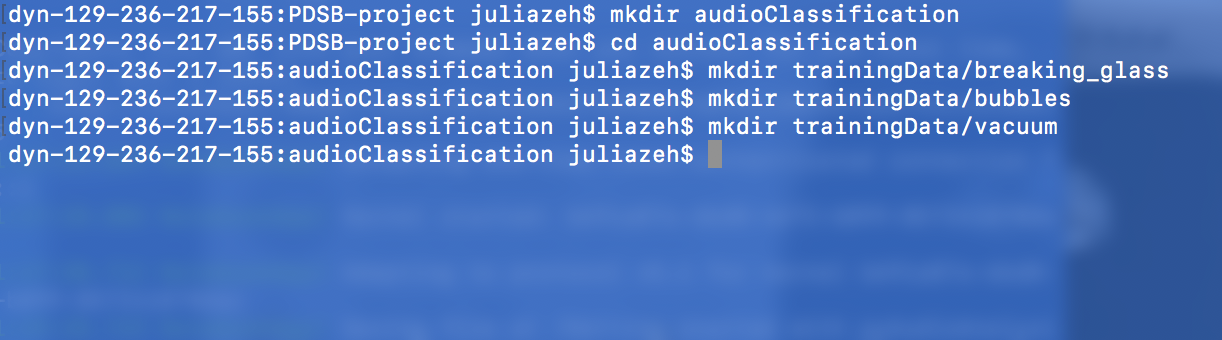

In these directories, insert files for each of these sound types. "Next do a Google search looking for free audio files to add to the trainingData directory: e.g. breaking glass audio wav free, then for bubble sounds try bubbles audio wav free, finally for vacuum sounds try vacuum audio wav free. Save a dozen or so examples of each sound into the corresponding sub-directory under trainingData. The pyAudioAnalysis library requires wav files, so make sure any files you save to trainingData are wav files." (http://rwx.io/blog/2016/04/08/bp-pyaudioanalysis/)

I found breaking glass sounds at this site: http://www.grsites.com/archive/sounds/category/3/?offset=36 and http://soundbible.com/tags-broken-glass.html and https://www.freespecialeffects.co.uk/pages/glass.html

Bubbles: http://www.findsounds.com/ISAPI/search.dll?keywords=bubbles

Vacuum:http://www.findsounds.com/ISAPI/search.dll?keywords=vacuum+cleaner and http://soundbible.com/tags-vacuum.html and http://www.pacdv.com/sounds/domestic_sounds-2.html and https://www.freesoundeffects.com/free-sounds/household-10036/100/tot_sold/20/6/

#### Sample Data
These files are the "unknown" sounds we will be running the function on in order to classify them. Make a folder called `sampleData` within `audioClassification` and fill this with a few files for each of the categories (breaking glass, bubbles, and vacuum - make sure these are different files from the ones in the `testData` directory) in addition to a few other random sounds as well.

For example, I used a total of 6 .wav files in this directory, which were downloaded from these sites: http://www.findsounds.com/ISAPI/search.dll?keywords=glass ,
http://www.wavsource.com/sfx/sfx.htm ,
https://www.partnersinrhyme.com/soundfx/household_sounds/Vaccuum1_wav.shtml ,
http://soundbible.com/2199-Marbles.html ,
http://soundbible.com/2193-Flock-Seagulls.html , and
http://soundbible.com/2200-Sawing-Wood.html

In [39]:
from pyAudioAnalysis import audioTrainTest as aT
import os

def get_immediate_subdirectories(a_dir):
    return [name for name in os.listdir(a_dir)
            if os.path.isdir(os.path.join(a_dir, name))]

subdirectories = get_immediate_subdirectories('/Users/juliazeh/PDSB/PDSB-project/audioClassification/trainingData')
aT.featureAndTrain(subdirectories, 1.0, 1.0, aT.shortTermWindow, aT.shortTermStep, "svm", "svmModel", False)

Help from https://stackoverflow.com/questions/800197/how-to-get-all-of-the-immediate-subdirectories-in-python in finding "get_immediate_subdirectories."

In [43]:
from sys import argv
import numpy as np
from pyAudioAnalysis import audioTrainTest as aT

def test_classifier_model(filename):
    isSignificant = 0.8 #try different values.

    # P: list of probabilities
    P = aT.fileClassification(filename, "svmModel", "svm")
    winner = np.argmax(P) #pick the result with the highest probability value.

    # is the highest value found above the isSignificant threshhold? 
    if P[winner] > isSignificant :
      print("File: " +filename + " is in category: " + classNames[winner] + ", with probability: " + str(P[winner]))
    else :
      print("Can't classify sound: " + str(P))

In [46]:
test_classifier_model("sampleData/glass_break_06.wav")